# Simulating the recordings of an accelerometer

## Problem

Given an accelerometer's movement, we want to calculate the readings of its sensors.

## Solution

If a point of mass $m$ moves following the curve $\vec r(t)$ according to one system of coordinates, the movement will _look_ as $\vec r'(t) = \vec r(t) - \vec R(t)$ from a coordinate system that is moving along the curve $\vec R(t)$ and rotating with a rotation matrix $\Omega(t)$.

It is known from Coriolis force that the equation governing the accelerations measured by the accelerometer is given by:

$$
m\vec{a'} = m \vec{a} - m \ddot{\vec R} - m \dot{\vec{\omega}}\times\vec{r'} - 2m \vec{\omega}\times \vec{v'} - m\vec{\omega}\times (\vec{\omega}\times \vec{r'})
$$

where prime vectors refer to vectors measured from the non-inertial frame of reference and $\vec \omega$ is the angular speed vector, closely related to the rotation matrix.

In the case of an accelerometer, the non-inertial frame travels with the object we want to study, and thus $\vec r' = \vec v' = \vec 0$.
This simplifies greatly the previous equation. All we need is:

$$
\vec a' = \vec a - \ddot{\vec R}
$$

This equation is trickier to apply than it looks. This is because we are forced to work with two different coordinate systems, and in order to operate, we need to express all the vectors present in the equation in the same one. We can use the rotation equation for this:

$$
\begin{bmatrix}
a_x \\
a_y \\
a_z
\end{bmatrix}_{non inertial}
=
\Omega(t)
\cdot
\left(
\begin{bmatrix}
a_x \\
a_y \\
a_z
\end{bmatrix}
-
\begin{bmatrix}
\ddot R_x \\
\ddot R_y \\
\ddot R_z
\end{bmatrix}
\right)
$$

### Simplified solution

Rotations are extremelly annoying. They force us to work with matrices and, even worse, with rotated coordinate systems. Fortunately, some properties of vectors are independent of the coordinates used. And acceleration is a vector.

One of this coordinate-invariant properties is the norm. The norm represents the length of the vector or, in the case of accelerations, its magnitude. The norm is a destructive operation, in the sense that all information about directionality is neglected.

It can be proven that, if we take norms at both sides of our previous equation, the following relationship holds:

$$
\left\lVert \vec a' \right\rVert = \left\lVert  \vec a - \ddot{\vec R} \right\rVert
$$

The equation above can be used regardless of the coordinate system chosen, making it a great pra

### A note about notation

We use the notation, very common in mechanics and kinematics, of a double dot over a state to denote its second derivative, i.e.:

$$
\ddot f = \frac{d^2 f}{dt^2}
$$

## Create input

We need to define two things:

1. The world in which the accelerometer moves. This is given by the accelerations that exist on it (typically gravitation). We'll code this in the object `a`.
2. The way the accelerometer moves, given by the objects `R` (for displacement) and `omega` (for rotations).

Please note that `a` and `R` are functions of time that return column vectors, and `omega` is a function of time that returns a square matrix with the same dimensionality as the vectors (i.e.: $2 \times 2$ for plane vectors, $3 \times 3$ for spatial vectors).

### Example: rectilinear movement with uniform acceleration

In this case the corresponding displacement is:

$$
\vec R(t) = \vec R_0 + \vec v_0 t + \frac{1}{2} \vec{a_0} t^2
$$

where $\vec R_0$ is the initial position, $\vec v_0$ the initial velocity and $\vec a_0$ the constant acceleration.

The movement is rectilinear, so there is no rotation:

$$
\Omega(t) = \mathbb{I}
$$

In Python terms, we can write:

```python
def R(t, R0 = np.matrix([[0],[0]]), v0 = np.matrix([[0],[0]]), a0 = np.matrix([[0],[-9.81]])):
    return(R0 + v0 * t + 0.5 * a0 * t**2)
```

```python
def omega(t):
    return(np.identity(2))
```

### Example: uniform circular movement without frame rotation

The displacement for a circular movement is given by:

$$
\vec R(t) = R_0 \begin{bmatrix} 
                     \cos(\omega t) \\
                     \sin(\omega t)
                \end{bmatrix}
$$

where $R_0$ is the radius and $\omega$ the angular speed.

As in the example above, it there is no rotation we have $\Omega(t) = \mathbb{I}$.

In Python:

```python
def R(t, R0 = 1, w = 2*np.pi):
    return(R0 * np.matrix([[np.cos(w*t)],
                           [np.sin(w*t)]]))
```

```python
def omega(t):
    return(np.identity(2))
```

### Example: uniform circular movement with frame rotation

If our non-inertial frame of reference rotates synchronously with the displacement, the rotation matrix becomes:

$$
\Omega(t) = \begin{bmatrix}
                \cos(\omega t) & \sin(\omega t) \\
                -\sin(\omega t) & \cos(\omega t)
            \end{bmatrix}
$$

In Python:

```python
def R(t, R0 = 1, w = 2*np.pi):
    return(R0 * np.matrix([[np.cos(w*t)],
                           [np.sin(w*t)]]))
```

```python
def omega(t):
    return(np.matrix([[+np.cos(w*t), np.sin(w*t)], 
                      [-np.sin(w*t), np.cos(w*t)]]))
```

## Code it

### Install dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.linalg import norm

### Calculate the acceleration "felt" by the accelerometer

The equation

$$
\vec a'_{ni}(t) = \Omega(t) \left(\vec a_{i}(t) - \ddot{\vec R}_{i}(t) \right)
$$

can be coded as



In [2]:
def a_ni(t, 
         a = lambda t : np.matrix([[0], [-9.8]]),
         R = lambda t : np.matrix(([0], [0])), 
         omega = lambda t : np.identity(2)):
    '''Vectorial acceleration in the non-intertial system'''

    # Auxiliary functions
    
    def V(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative speed'''
        return(derivative(R, x0=t, dx=dx, **kwargs))



    def A(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative acceleration'''
        return(derivative(V, x0=t, dx=dx, **kwargs))

    # Rotate external acceleration
    rot_a = omega(t)*a(t)

    # Calculate and rotate relative acceleration
    rot_ni = omega(t)*A(t)

    # Apply formula
    return(rot_a - rot_ni)

the simplified case

$$
\left\lVert \vec a'(t) \right\rVert = \left\lVert \vec a(t) - \ddot{\vec R}(t) \right\rVert
$$

can be coded as:

In [3]:
def a_ni2(t, a = lambda t : np.matrix([[0], [-9.8]]),
             R = lambda t : np.matrix(([0], [0]))):
    '''Absolute acceleration in the non-intertial system'''
    
    # Auxiliary functions
    def V(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative speed'''
        return(derivative(R, x0=t, dx=dx, **kwargs))

    def A(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative acceleration'''
        return(derivative(V, x0=t, dx=dx, **kwargs))

    return(norm(a(t) - A(t)))

## Vectorized inputs

The functions defined above only accept one value of $t$ per call, and they return a matrix object. We can vectorize them with the help of the decorator below:

In [4]:
def arrayify(f):
    
    def ensure_iterable(x):
        '''Coerces single number x into the one-element iterator (x, )'''
        return (x,) if not hasattr(x, '__iter__') else x
    
    def vectorized_f(ts, *args, **kwargs):
        ts = ensure_iterable(ts) # Useful for uniformity. Otherwise, calling with a double or integer would fail
        results = map(lambda t : f(t, *args, **kwargs), ts)
    
        results_list = list(results) # List of matrices
        results_array = np.asarray(results_list).transpose()[0]
        
        return(results_array)
    
    return(vectorized_f)

# TODO: merge this decorator in one
def arrayify_abs(f):
    
    def ensure_iterable(x):
        '''Coerces single number x into the one-element iterator (x, )'''
        return (x,) if not hasattr(x, '__iter__') else x
    
    def vectorized_f(ts, *args, **kwargs):
        ts = ensure_iterable(ts) # Useful for uniformity. Otherwise, calling with a double or integer would fail
        results = map(lambda t : f(t, *args, **kwargs), ts)
    
        results_list = list(results) # List of matrices
        results_array = np.asarray(results_list).transpose() # <-- This is the only difference with arrayify
        
        return(results_array)
    
    return(vectorized_f)

So we can redefine:

In [5]:
@arrayify
def a_ni(t, 
         a = lambda t : np.matrix([[0], [-9.8]]),
         R = lambda t : np.matrix(([0], [0])), 
         omega = lambda t : np.identity(2)):
    '''Vectorial acceleration in the non-intertial system'''

    # Auxiliary functions
    def V(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative speed'''
        return(derivative(R, x0=t, dx=dx, **kwargs))

    def A(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative acceleration'''
        return(derivative(V, x0=t, dx=dx, **kwargs))

    # Rotate external acceleration
    rot_a = omega(t)*a(t)

    # Calculate and rotate relative acceleration
    rot_ni = omega(t)*A(t)

    # Apply formula
    return(rot_a - rot_ni)

@arrayify_abs
def a_ni_abs(t, 
             a = lambda t : np.matrix([[0], [-9.8]]),
             R = lambda t : np.matrix(([0], [0]))):
    '''Absolute acceleration in the non-intertial system'''
    
    # Auxiliary functions
    def V(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative speed'''
        return(derivative(R, x0=t, dx=dx, **kwargs))

    def A(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative acceleration'''
        return(derivative(V, x0=t, dx=dx, **kwargs))

    return(norm(a(t) - A(t)))

## Play and plot

We'll need an auxiliary function to do nice plots. Certainly this can be done in a much more elegant and efficient way using vectorization, but I am feeling to lazy to try that now.

In [6]:
# The following plotting functions will be handy later
def plot_accel(ts, a_ni, a):

    accels = arrayify(a)(ts) # If we arrayify this too early, the matrix products inside a_ni will fail
    accels_ni = a_ni(ts, a, R, omega)
    ndim = len(accels_ni[:, 0]) # Number of dimensions = number of rows

    fig, axs = plt.subplots(1, ndim, sharey=True)
    fig.suptitle('Vector accelerations')

    for i in range(0, ndim):
        axs[0].plot(ts, accels[i, ])
    for i in range(0, ndim):
        axs[1].plot(ts ,accels_ni[i, ])
    for i in range(0, 2):
        axs[i].set_xlabel('time')
    
    axs[0].set_title('Intertial frame')
    axs[0].set_ylabel('Acceleration')
    axs[1].set_title('Non-intertial frame')
        
def plot_absaccel(ts, a_ni2, a):
    
    accels = arrayify(a)(ts) # If we arrayify this too early, the matrix products inside a_ni will fail
    accels_ni = a_ni_abs(ts, a, R)
    
    fig, axs = plt.subplots(1, 2, sharey=True)
    fig.suptitle('Total accelerations')

    axs[0].plot(ts, accels[1, ]) # TODO: actually return the norm per column
    axs[1].plot(ts ,accels_ni)
    for i in range(0, 2):
        axs[i].set_xlabel('time')
    
    axs[0].set_title('Intertial frame')
    axs[0].set_ylabel('Acceleration')
    axs[1].set_title('Non-intertial frame')

## Example: rectilinear movement with uniform acceleration (free-falling object)

In this example we simulate a free-falling object, that is, a rectilinear movement with an acceleration of $(0, -g)$. We see that the measured acceleration is $0$.

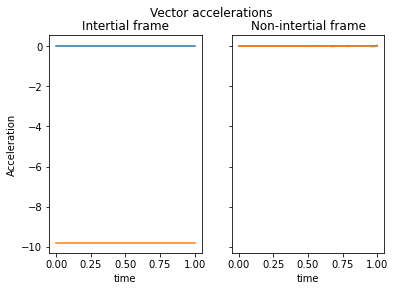

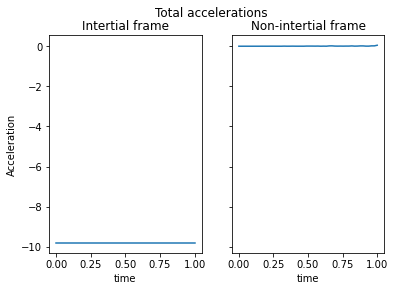

In [7]:
g = 9.81 # Acceleration of gravity (in m/s^2)

def a(t):
    '''Acceleration in the inertial system'''
    return(np.matrix([[.0], 
                      [-g]]))

def R(t, R0 = np.matrix([[0],[0]]), v0 = np.matrix([[0],[0]]), a0 = np.matrix([[0],[-g]])):
    '''Relative displacement'''  
    return(R0 + v0 * t + 0.5 * a0 * t**2)

def omega(t):
    '''Relative rotation matrix'''  
    return(np.identity(2))


ts = np.linspace(0, 1)
plot_accel(ts, a_ni, a)
plot_absaccel(ts, a_ni, a)

## Example: rotation in absence of gravity

In this case, we don't expect any acceleration in the inertial system, but an outwards-pointing (positive x' axis) acceleration in the rotating one (due to the centrifugal pseudoforce).

The intensity of the centrifugal acceleration in a circular movement of radius $R$ and angular speed $\omega$ is known to be:

$$
a'(t) = \omega^2 R
$$

So, with our current parameters, we expect:

$$
a'(t) \approx \left( 40, 0 \right) \frac{m}{s^2}
$$

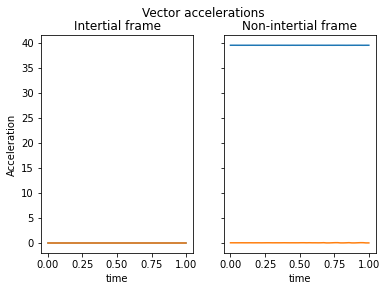

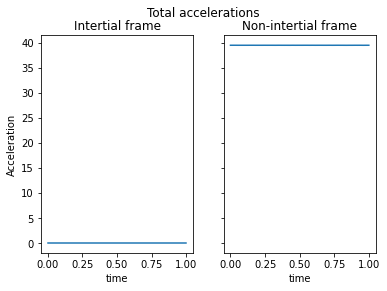

In [8]:
# Parameters
R0 = 1 # Radius of rotation
w = 2*np.pi # Angular speed

def a(t):
    '''Acceleration in the inertial system'''
    return(np.matrix([[.0], 
                      [.0]]))

def R(t):
    '''Relative displacement'''    
    return(R0 * np.matrix([[np.cos(w*t)],
                           [np.sin(w*t)]]))

def omega(t):
    '''Relative rotation matrix'''
    return(np.matrix([[+np.cos(w*t), np.sin(w*t)], 
                      [-np.sin(w*t), np.cos(w*t)]]))

ts = np.linspace(0, 1)
plot_accel(ts, a_ni, a)
plot_absaccel(ts, a_ni, a)

## Example: rotation and gravity

The example above can be modified slightly to introduce gravity. The results start to get interesting.

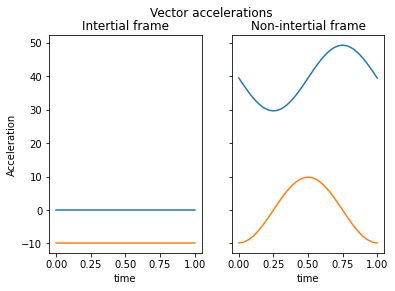

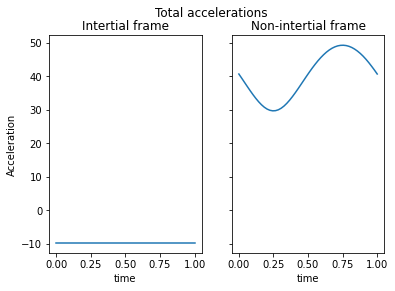

In [9]:
# Parameters
g = 9.81 # Gravitational acceleration (unsigned)
R0 = 1 # Radius of rotation
w = 2*np.pi # Angular speed

def a(t):
    '''Acceleration in the inertial system'''
    return(np.matrix([[.0], 
                      [-g]]))

def R(t):
    '''Relative displacement'''    
    return(R0 * np.matrix([[np.cos(w*t)],
                           [np.sin(w*t)]]))

def omega(t):
    '''Relative rotation matrix'''
    return(np.matrix([[+np.cos(w*t), np.sin(w*t)], 
                      [-np.sin(w*t), np.cos(w*t)]]))

ts = np.linspace(0, 1)
plot_accel(ts, a_ni, a)
plot_absaccel(ts, a_ni, a)

## Example: plane roller-coaster (TODO: work in progress)

If our movement traces any arbitrary curve such as:

$$
\vec r = \vec r(t)
$$

It is easy to prove that the local trihedron is given by:

$$
\begin{cases}
\begin{align}
\hat t(t) & = \frac{1}{v(t)} \dot{\vec r}(t) \\
\hat b(t) & = \hat k \\
\hat n(t) & = \hat k \times \hat t(t)
\end{align}
\end{cases}
$$

where the three vectors represent the tangent, binormal and normal directions. For convenience, we have defined:

$$
v(t) = \left | \dot{\vec r}(t) \right |
$$

and

$$
\dot{\vec r}(t) = \begin{bmatrix} v_x(t) \\ v_y(t) \end{bmatrix}
$$

The corresponding rotation matrix is thus:

$$
\Omega(t) = \frac{1}{v(t)} 
            \begin{bmatrix}
                v_x(t) & v_y(t) \\
                -v_y(t) & v_x(t)
            \end{bmatrix}
$$

This allows us to write a more automatic version of the previous functions, where the rotation matrix is calculated automatically.

In [10]:
def a_ni_auto(t, a = lambda t : np.matrix([[0], [-9.8]]),
              R = lambda t : np.matrix(([0], [0]))):
    '''Vectorial acceleration in the non-intertial system'''
    
    # Auxiliary functions
    def V(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative speed'''
        return(derivative(R, x0=t, dx=dx, **kwargs))

    def A(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative acceleration'''
        return(derivative(V, x0=t, dx=dx, **kwargs))
    
    def vx(t):
        ''' Component x of velocity'''
        return(float(V(t)[0]))
    
    def vy(t):
        ''' Component y of velocity'''
        return(float(V(t)[1]))
    
    def omega(t):
        '''Relative rotation matrix'''
        magnitude = np.sqrt(vx(t)**2 + vy(t)**2)
        matrix = np.matrix([[vx(t), vy(t)], 
                            [-vy(t), vx(t)]])
        
        return(1 / magnitude * matrix)
        
    
    # Rotate external acceleration
    rot_a = omega(t)*a(t)
    
    # Calculate and rotate relative acceleration
    rot_ni = omega(t)*A(t)
    
    # Apply formula
    return(rot_a - rot_ni)

We also have to update the auxiliary plotter (more elegant implementations will follow).

In [11]:
def auxiliary_plotter_auto(ts):
    '''Evaluate and plot vectorial accelerations for a given times vector'''
    
    # Containers for the accelerations
    asx = np.zeros(len(ts)) # In the inertial ...
    asy = np.zeros(len(ts))
    asnix = np.zeros(len(ts)) # ... and non inertial frame
    asniy = np.zeros(len(ts))
    xs = np.zeros(len(ts))
    ys = np.zeros(len(ts))

    # Loop and unpack information
    for i in range(len(ts)):
        accels = a(ts[i])
        asx[i] = accels[0]
        asy[i] = accels[1]
    
        accels_ni = a_ni_auto(ts[i], a, R) # a, R and omega are taken from the environment. Probably not a good practice
        asnix[i] = accels_ni[0]
        asniy[i] = accels_ni[1]
        
        xs[i] = float(R(ts[i])[0])
        ys[i] = float(R(ts[i])[1])
        
    fig, axs = plt.subplots(3, 1, sharey=True)
    fig.suptitle('Plane roller-coaster')

    axs[0].set_title('Inertial frame')
    axs[0].set_ylabel('accel')
    axs[0].plot(ts, asx, label = 'x')
    axs[0].plot(ts, asy, label = 'y')
    

    axs[1].set_title('Non-inertial frame')
    axs[1].plot(ts, asnix, label = 'x')
    axs[1].plot(ts, asniy, label = 'y')
    
    axs[2].set_title('Trajectory')
    #axs[2].plot(ts, xs, label = 'x')
    axs[2].plot(ts, ys, label = 'y')

    axs[0].legend()

    for ax in axs.flat:
        ax.set_xlabel('time')

Let's play with it, simulating, for instance, a sinusoidal roller-coaster:

$$
\vec r(t) = \begin{bmatrix} t \\ \sin(t) \end{bmatrix}
$$

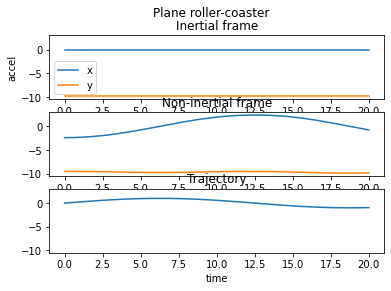

In [12]:
# Parameters
g = 9.81 # Gravitational acceleration (unsigned)
w = 2*np.pi / 25 # Angular speed

def a(t):
    '''Acceleration in the inertial system'''
    return(np.matrix([[.0], 
                      [-g]]))

def R(t):
    '''Relative displacement'''    
    return(np.matrix([[t],
                      [np.sin(w*t)]]))

# Times to plot
ts = np.linspace(0, 20, 500)
auxiliary_plotter_auto(ts)


## Testing

With the comparing function below we can check that our norm approach is equivalent to the vectorial one

1.7763568394002505e-15

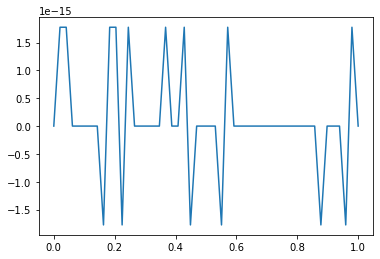

In [13]:
# TODO: use vectorized functions to write this test more elegantly
def comparer(ts, plot=True):
    ''' Compare the absolute accelerations calculated from vector or from norm approaches'''
    # Containers for the accelerations
    
    ## Inertial frame
    asx = np.zeros(len(ts)) # x
    asy = np.zeros(len(ts)) # y
    asa = np.zeros(len(ts)) # Absolute
    
    ## Non-inertial frame
    asnix = np.zeros(len(ts)) # x
    asniy = np.zeros(len(ts)) # y
    asnia1 = np.zeros(len(ts)) # Absolute (calculated from vectorial)
    asnia2 = np.zeros(len(ts)) # Absolute (calculated from norm)
    
    # Loop and unpack information
    for i in range(len(ts)):
        accels = a(ts[i])
        asx[i] = accels[0]
        asy[i] = accels[1]
        asa[i] = np.sqrt(accels[0]**2 + accels[1]**2)
    
        accels_ni = a_ni(ts[i], a, R, omega) # a, R and omega are taken from the environment. Probably not a good practice
        asnix[i] = accels_ni[0]
        asniy[i] = accels_ni[1]
        asnia1[i] = np.sqrt(accels_ni[0]**2 + accels_ni[1]**2)
        asnia2[i] = a_ni2(ts[i], a, R)
    
    if plot:
        plt.plot(ts, asnia1 - asnia2)
    
    ## We expect the absolute error to be negligible
    absErr = np.max(np.abs(asnia1 - asnia2))
    return(absErr)
    
ts = np.linspace(0, 1)
comparer(ts)

## To be continued

Check TODOs.